In [57]:
%pip install pandas
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [58]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


In [80]:
apple = pd.read_csv('data/applemobilitytrends-2022-01-06.csv')

C:\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [81]:
APPLE_COL_TO_DEL = ["alternative_name", "sub-region",	"country"]


for i in APPLE_COL_TO_DEL:
    del apple[i]

In [97]:
REGION_INTEREST = "Brazil"

apple_brazil = apple[apple["region"] == REGION_INTEREST]

In [98]:
apple_brazil

,geo_type,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2021-12-28,2021-12-29,2021-12-30,2021-12-31,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06
12,country/region,Brazil,driving,100.0,99.71,100.90,101.88,113.69,114.38,91.06,...,183.78,192.09,217.12,210.90,138.04,184.31,175.95,160.07,152.73,153.14
13,country/region,Brazil,transit,100.0,102.45,104.28,100.20,97.06,81.01,69.05,...,92.14,89.71,86.50,64.51,48.66,74.97,98.39,99.90,97.47,93.25
14,country/region,Brazil,walking,100.0,106.30,104.75,99.05,104.13,101.18,69.84,...,186.21,198.75,208.25,234.37,152.27,146.49,160.31,161.23,159.69,160.03


In [99]:
DATA_TO_CLEAR = ["2020-05-11", "2020-05-12", "2021-03-12"]

In [100]:
apple_brazil[DATA_TO_CLEAR]

,2020-05-11,2020-05-12,2021-03-12
12,NaN,NaN,NaN
13,NaN,NaN,NaN
14,NaN,NaN,NaN


In [101]:
for i in DATA_TO_CLEAR:
    del apple_brazil[i]

In [102]:
TEXT_COL = ["geo_type", "region", "transportation_type"]

numeric_col = list(apple_brazil.columns)

for i in TEXT_COL:
    del numeric_col[numeric_col.index(i)]

In [103]:
apple_brazil[numeric_col] = apple_brazil[numeric_col] - 100

C:\Python39\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [104]:
apple_brazil

,geo_type,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2021-12-28,2021-12-29,2021-12-30,2021-12-31,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06
12,country/region,Brazil,driving,0.0,-0.29,0.90,1.88,13.69,14.38,-8.94,...,83.78,92.09,117.12,110.90,38.04,84.31,75.95,60.07,52.73,53.14
13,country/region,Brazil,transit,0.0,2.45,4.28,0.20,-2.94,-18.99,-30.95,...,-7.86,-10.29,-13.50,-35.49,-51.34,-25.03,-1.61,-0.10,-2.53,-6.75
14,country/region,Brazil,walking,0.0,6.30,4.75,-0.95,4.13,1.18,-30.16,...,86.21,98.75,108.25,134.37,52.27,46.49,60.31,61.23,59.69,60.03


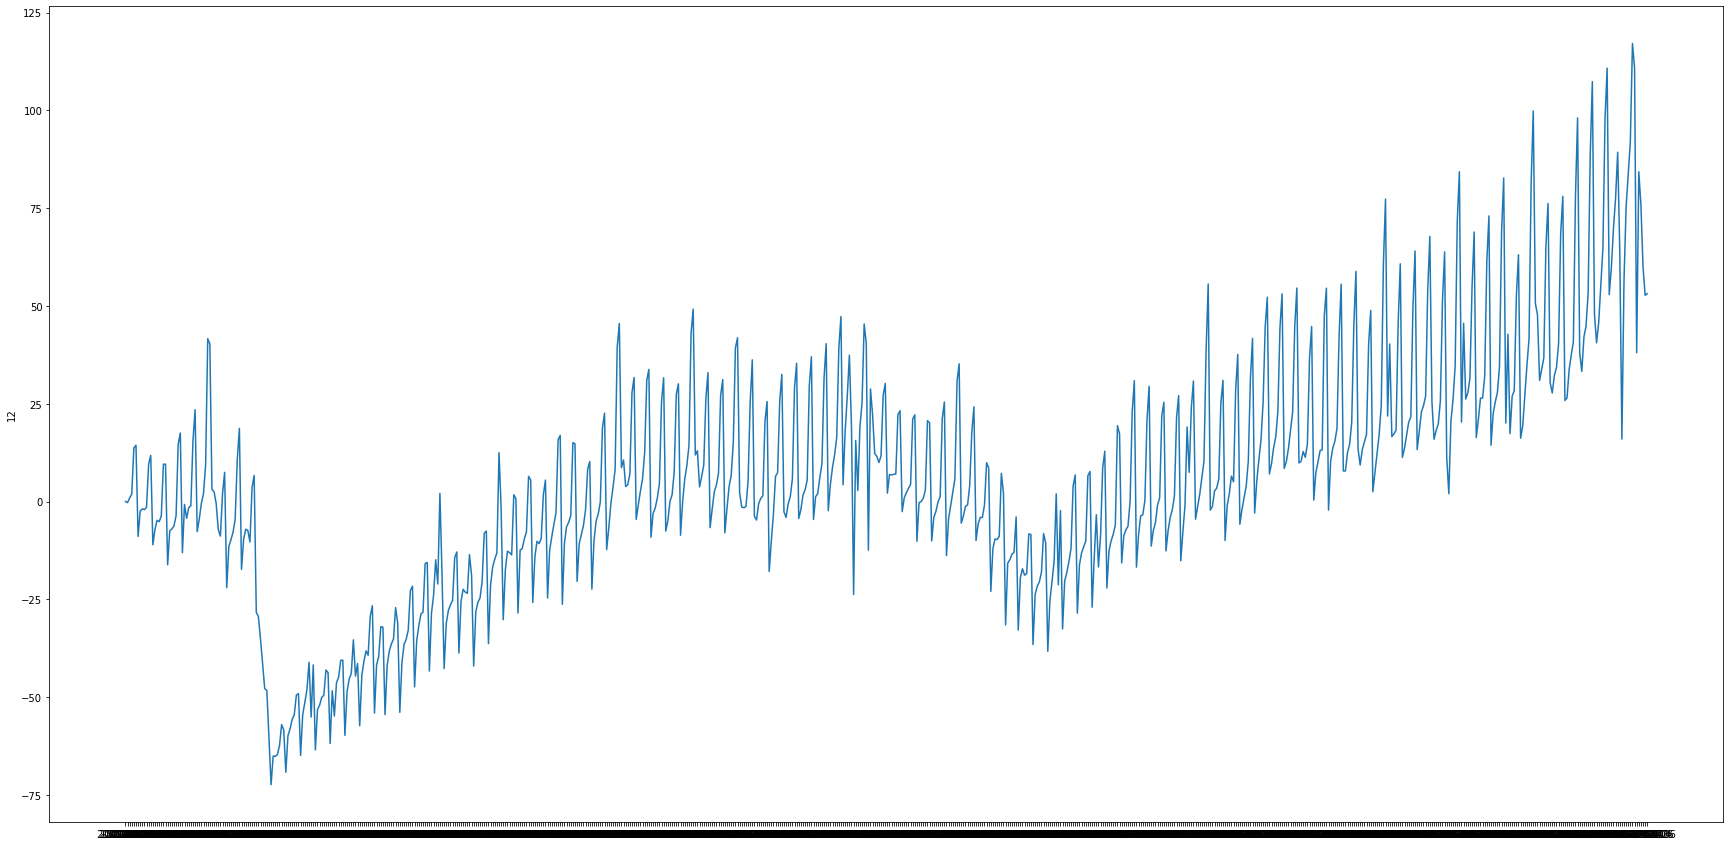

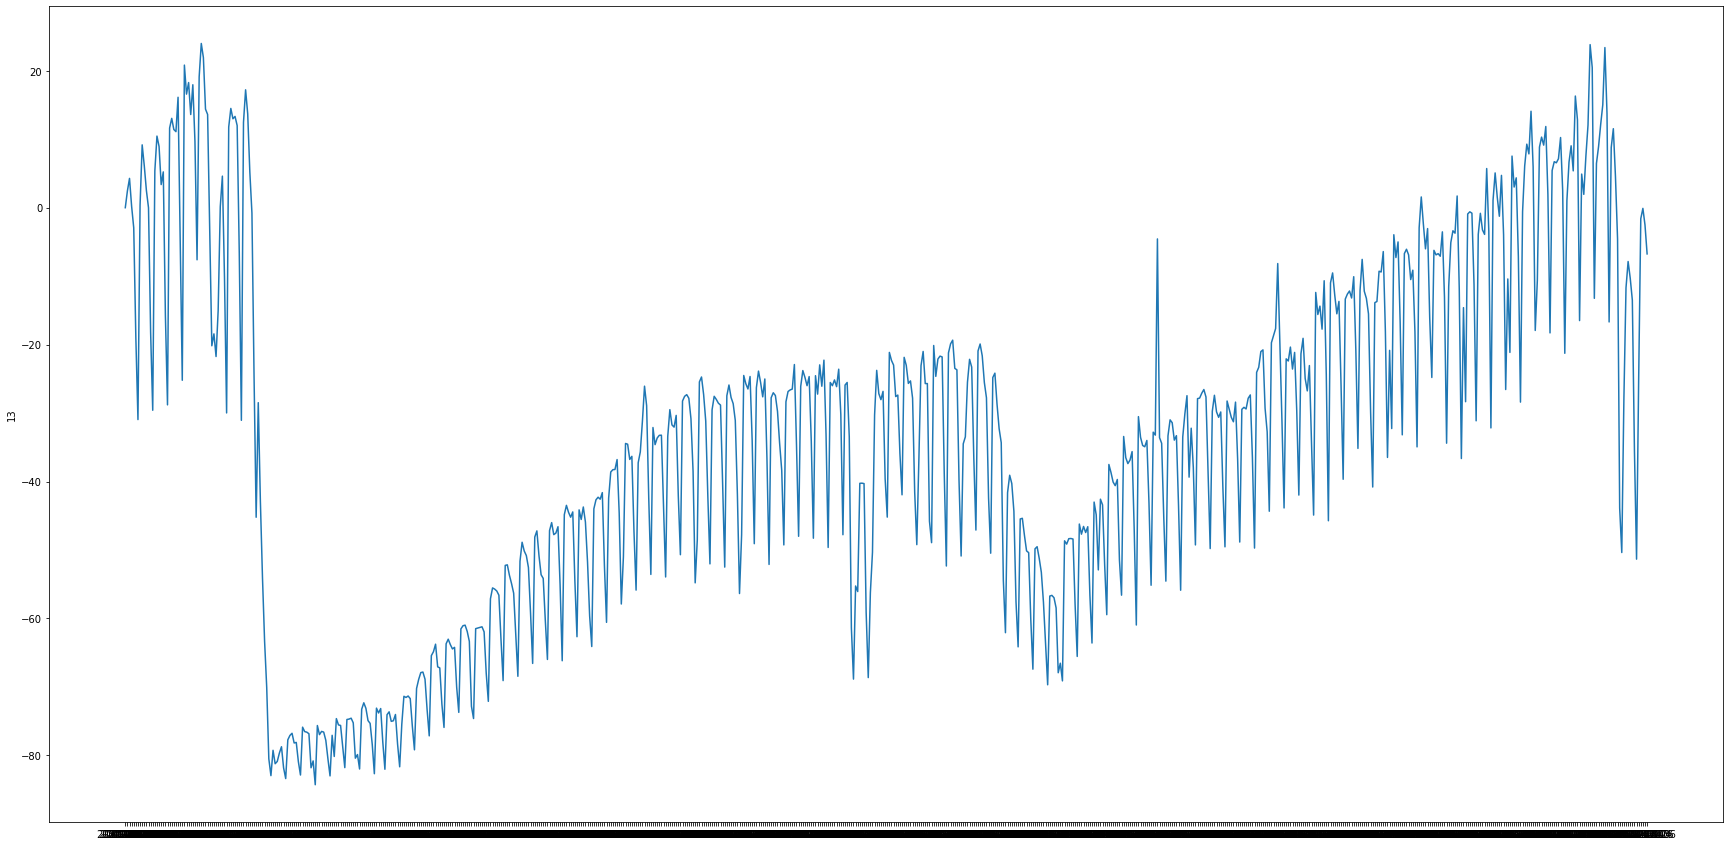

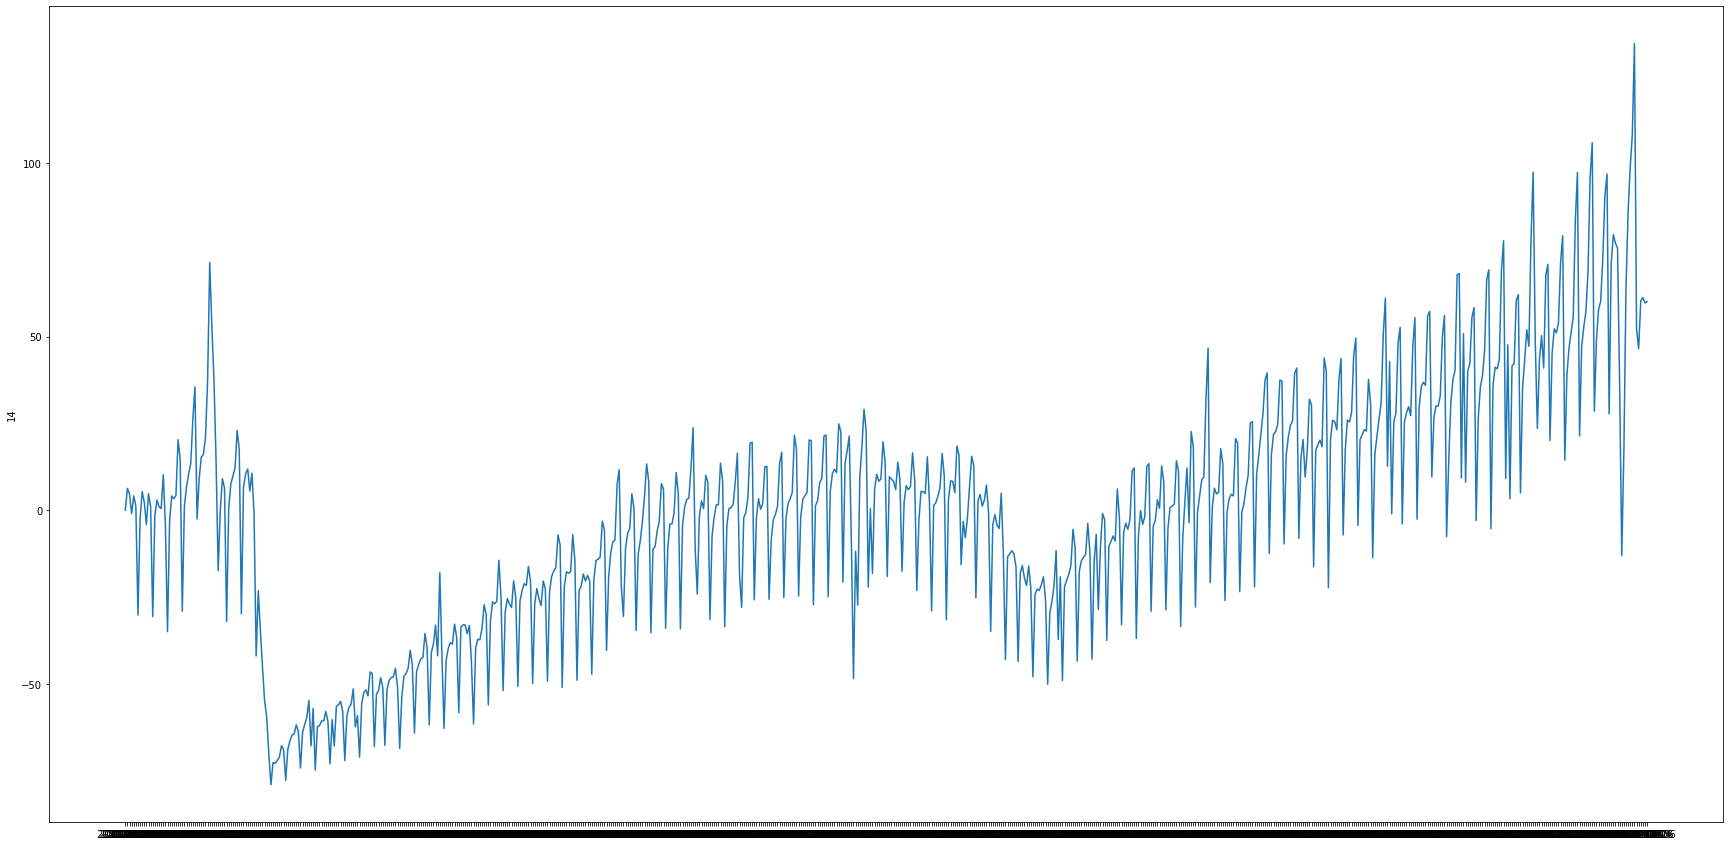

In [107]:
for i in apple_brazil['transportation_type']:
    fig, ax = plt.subplots(figsize=(30,15))

    sb.lineplot(x=numeric_col, y=apple_brazil[apple_brazil['transportation_type'] == i][numeric_col].iloc[0], ax=ax)
